In [1]:
%pip install pandas 
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset

In [3]:
pd.options.display.float_format = '{:,.2f}'.format # Set display options for better readability

In [4]:
fleti = pd.read_csv('fleti_cleaned.csv')

In [5]:
fleti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NASLOV            840 non-null    object 
 1   CENA              840 non-null    int64  
 2   OPIS              840 non-null    object 
 3   m2                840 non-null    float64
 4   LETO              840 non-null    int64  
 5   NASTROPJE         754 non-null    object 
 6   ZEMLJISCE         75 non-null     object 
 7   Lokacija          840 non-null    object 
 8   Lokacija_grouped  840 non-null    object 
 9   CENA_na_m2        840 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 65.8+ KB


In [6]:
fleti.describe()

,CENA,m2,LETO,CENA_na_m2
count,840.00,840.00,840.00,840.00
mean,"482,081.53",97.70,"1,951.96","5,057.97"
std,"346,114.74",58.87,106.79,"1,678.51"
min,"12,000.00",11.00,"1,456.00",100.00
25%,"269,000.00",58.00,"1,938.75","4,020.96"
50%,"365,000.00",80.13,"1,976.00","4,814.19"
75%,"575,312.50",122.02,"2,018.25","5,707.99"
max,"2,971,000.00",455.97,"2,027.00","14,357.05"


Text(0.5, 1.0, 'Boxplot of Prices')

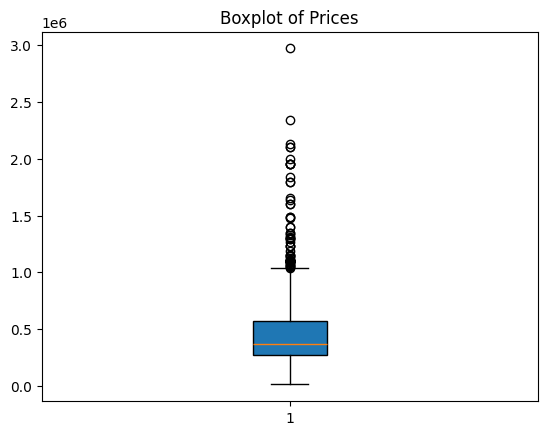

In [7]:
plt.boxplot(fleti['CENA'], vert=True, patch_artist=True)
plt.title('Boxplot of Prices')

FILTRIRANI PODATKI, KJER BOMO ODSTRANILI OUTLIERS:

In [8]:
# 1. Izračun kvartilov za stolpec 'price'
Q1 = fleti['CENA'].quantile(0.25)
Q3 = fleti['CENA'].quantile(0.75)
IQR = Q3 - Q1

# 2. Meje za izločanje outlierjev
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filtriranje vrstic brez outlierjev
fleti_cut = fleti[(fleti["CENA"] >= lower_bound) & (fleti["CENA"] <= upper_bound)]


In [9]:
fleti_cut.describe()

,CENA,m2,LETO,CENA_na_m2
count,777.00,777.00,777.00,777.00
mean,"407,919.95",90.33,"1,957.96","4,823.70"
std,"208,007.52",51.34,92.35,"1,377.34"
min,"12,000.00",11.00,"1,456.00",100.00
25%,"260,000.00",56.90,"1,946.00","3,940.00"
50%,"347,000.00",76.90,"1,976.00","4,709.68"
75%,"501,267.00",110.00,"2,011.00","5,531.83"
max,"1,034,565.00",327.61,"2,027.00","11,201.30"


Text(0.5, 1.0, 'Boxplot of Prices')

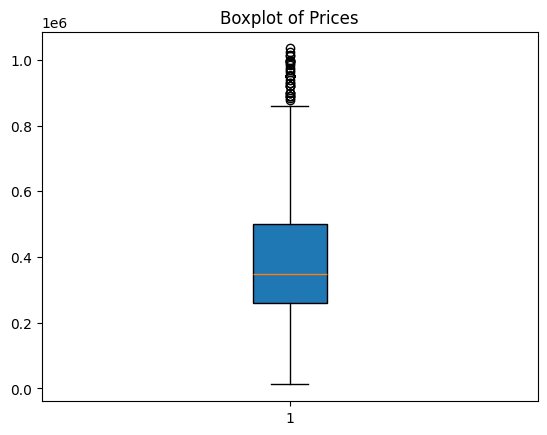

In [10]:
plt.boxplot(fleti_cut['CENA'], vert=True, patch_artist=True)
plt.title('Boxplot of Prices')

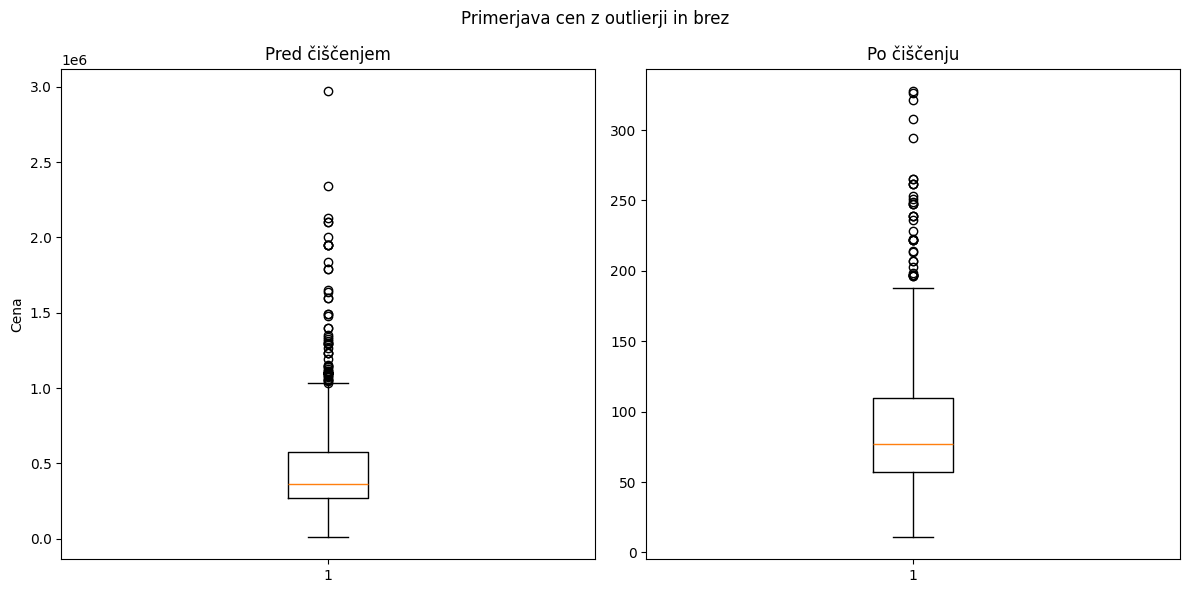

In [11]:

# Kvartili in IQR
Q1 = fleti['CENA'].quantile(0.25)
Q3 = fleti['CENA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Čiščenje
df_clean = fleti[(fleti['CENA'] >= lower_bound) & (fleti['CENA'] <= upper_bound)]

# 🔲 Subplot postavitev
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 vrstica, 2 stolpca

# Boxploti
axes[0].boxplot(fleti['CENA'])
axes[0].set_title("Pred čiščenjem")
axes[0].set_ylabel("Cena")

axes[1].boxplot(df_clean["m2"])
axes[1].set_title("Po čiščenju")


plt.suptitle("Primerjava cen z outlierji in brez")
plt.tight_layout()
plt.show()


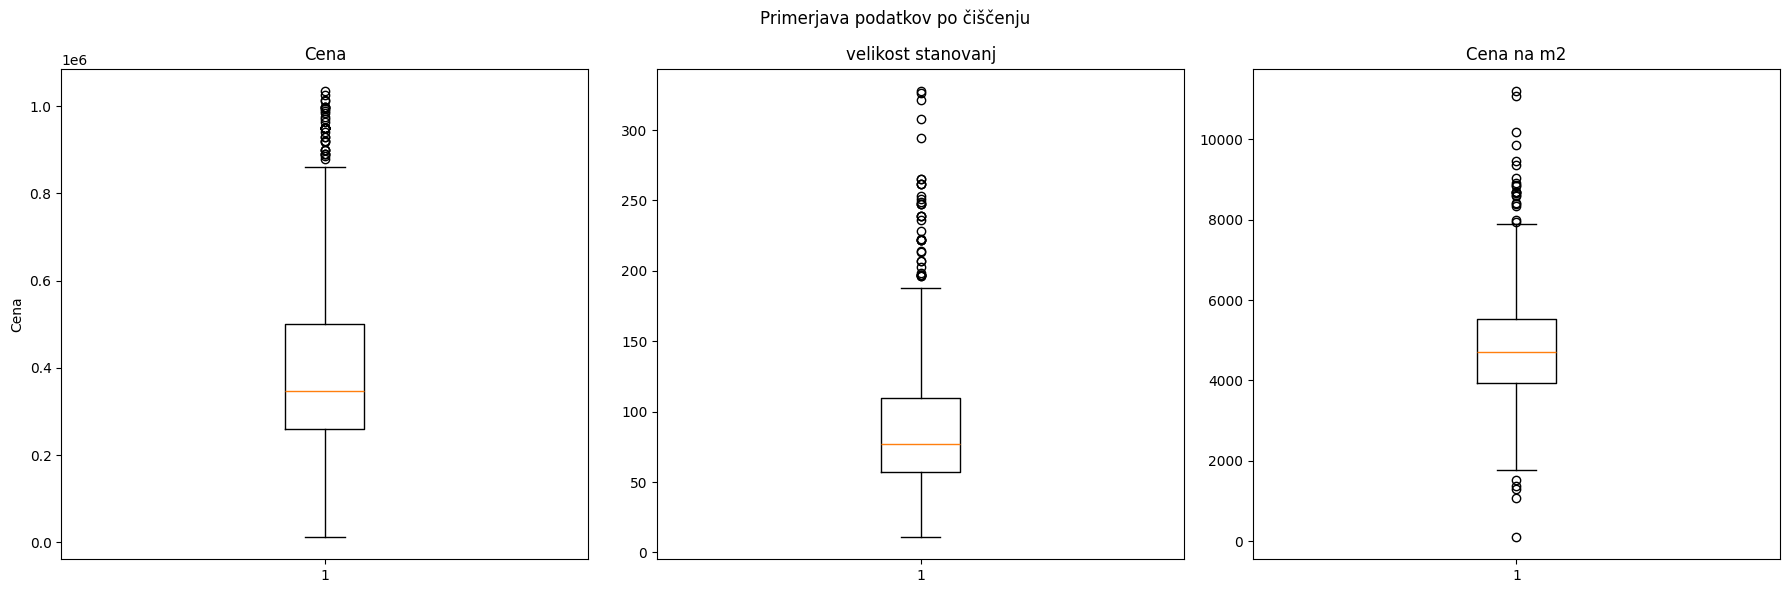

In [12]:
# Ustvari figuro s 3 podgrafi (namesto 2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 vrstica, 3 stolpci

# Boxploti
axes[0].boxplot(fleti_cut['CENA'])
axes[0].set_title("Cena")
axes[0].set_ylabel("Cena")

axes[1].boxplot(fleti_cut["m2"])
axes[1].set_title("velikost stanovanj")

axes[2].boxplot(fleti_cut["CENA_na_m2"])
axes[2].set_title("Cena na m2")

plt.suptitle("Primerjava podatkov po čiščenju")
plt.tight_layout()
plt.show()

In [13]:
fleti_cut.describe()

,CENA,m2,LETO,CENA_na_m2
count,777.00,777.00,777.00,777.00
mean,"407,919.95",90.33,"1,957.96","4,823.70"
std,"208,007.52",51.34,92.35,"1,377.34"
min,"12,000.00",11.00,"1,456.00",100.00
25%,"260,000.00",56.90,"1,946.00","3,940.00"
50%,"347,000.00",76.90,"1,976.00","4,709.68"
75%,"501,267.00",110.00,"2,011.00","5,531.83"
max,"1,034,565.00",327.61,"2,027.00","11,201.30"


HIŠE PREDSTAVITEV:

In [14]:
hise = pd.read_csv('houses_cleaned.csv')
hise.describe()

,CENA,m2,LETO,ZEMLJISCE,CENA_na_m2
count,359.00,359.00,359.00,321.00,359.00
mean,"795,689.23",237.14,"1,986.43","1,646.61","3,628.84"
std,"470,538.80",135.54,49.44,"3,982.28","1,560.11"
min,"1,990.00",41.30,"1,635.00",31.00,3.70
25%,"512,000.00",153.42,"1,967.00",307.00,"2,601.14"
50%,"663,000.00",200.00,"2,005.00",497.00,"3,452.03"
75%,"938,812.50",267.95,"2,024.00",805.00,"4,297.42"
max,"3,000,000.00","1,147.00","2,026.00","22,741.00","11,380.15"


Text(0.5, 1.0, 'Boxplot of Prices')

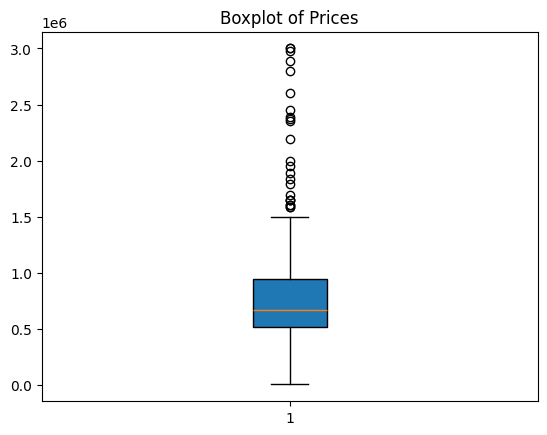

In [15]:
plt.boxplot(hise['CENA'], vert=True, patch_artist=True)
plt.title('Boxplot of Prices')

In [16]:
# 1. Izračun kvartilov za stolpec 'price'
Q1 = hise['CENA'].quantile(0.25)
Q3 = hise['CENA'].quantile(0.75)
IQR = Q3 - Q1

# 2. Meje za izločanje outlierjev
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filtriranje vrstic brez outlierjev
hise_cut = hise[(hise["CENA"] >= lower_bound) & (hise["CENA"] <= upper_bound)]

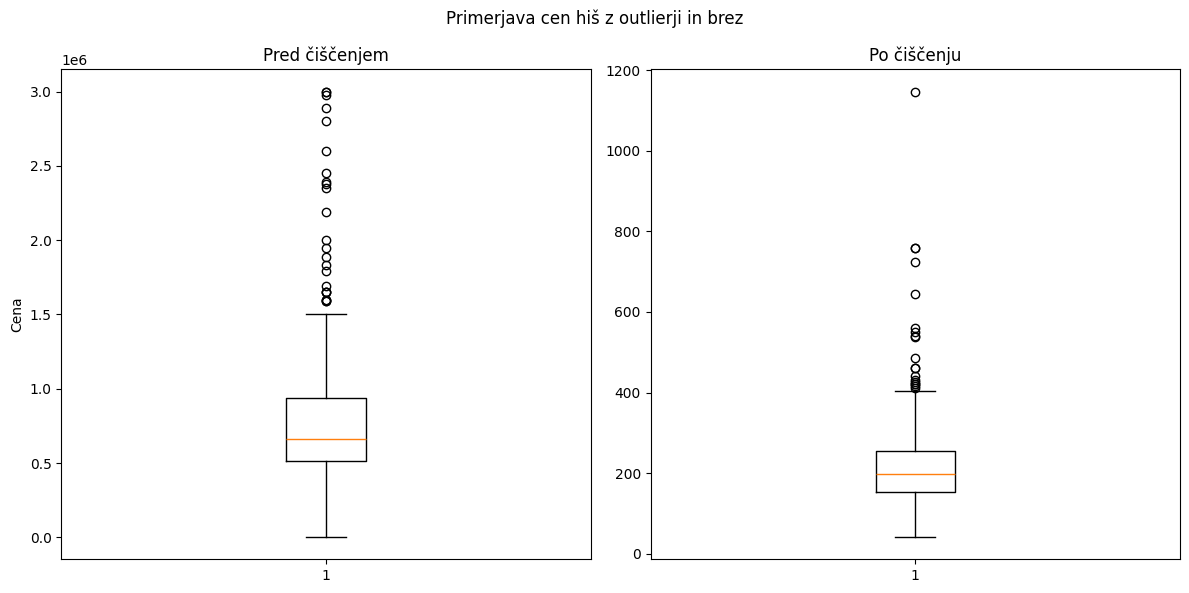

In [17]:
# Kvartili in IQR
Q1 = hise['CENA'].quantile(0.25)
Q3 = hise['CENA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Čiščenje
df_clean = hise[(hise['CENA'] >= lower_bound) & (hise['CENA'] <= upper_bound)]

# 🔲 Subplot postavitev
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 vrstica, 2 stolpca

# Boxploti
axes[0].boxplot(hise['CENA'])
axes[0].set_title("Pred čiščenjem")
axes[0].set_ylabel("Cena")

axes[1].boxplot(df_clean["m2"])
axes[1].set_title("Po čiščenju")


plt.suptitle("Primerjava cen hiš z outlierji in brez")
plt.tight_layout()
plt.show()

In [18]:
hise.describe() # podatki pred čiščenjem

,CENA,m2,LETO,ZEMLJISCE,CENA_na_m2
count,359.00,359.00,359.00,321.00,359.00
mean,"795,689.23",237.14,"1,986.43","1,646.61","3,628.84"
std,"470,538.80",135.54,49.44,"3,982.28","1,560.11"
min,"1,990.00",41.30,"1,635.00",31.00,3.70
25%,"512,000.00",153.42,"1,967.00",307.00,"2,601.14"
50%,"663,000.00",200.00,"2,005.00",497.00,"3,452.03"
75%,"938,812.50",267.95,"2,024.00",805.00,"4,297.42"
max,"3,000,000.00","1,147.00","2,026.00","22,741.00","11,380.15"


In [19]:
hise_cut.describe() #podatki po čiščenju

,CENA,m2,LETO,ZEMLJISCE,CENA_na_m2
count,335.00,335.00,335.00,299.00,335.00
mean,"698,935.63",221.30,"1,986.98","1,714.56","3,511.86"
std,"280,369.35",115.50,49.42,"4,117.55","1,472.44"
min,"1,990.00",41.30,"1,635.00",31.00,3.70
25%,"499,000.00",152.71,"1,967.00",305.50,"2,550.74"
50%,"646,970.00",197.00,"2,005.00",483.00,"3,389.83"
75%,"860,000.00",255.25,"2,024.00",800.00,"4,159.26"
max,"1,500,000.00","1,147.00","2,026.00","22,741.00","11,380.15"


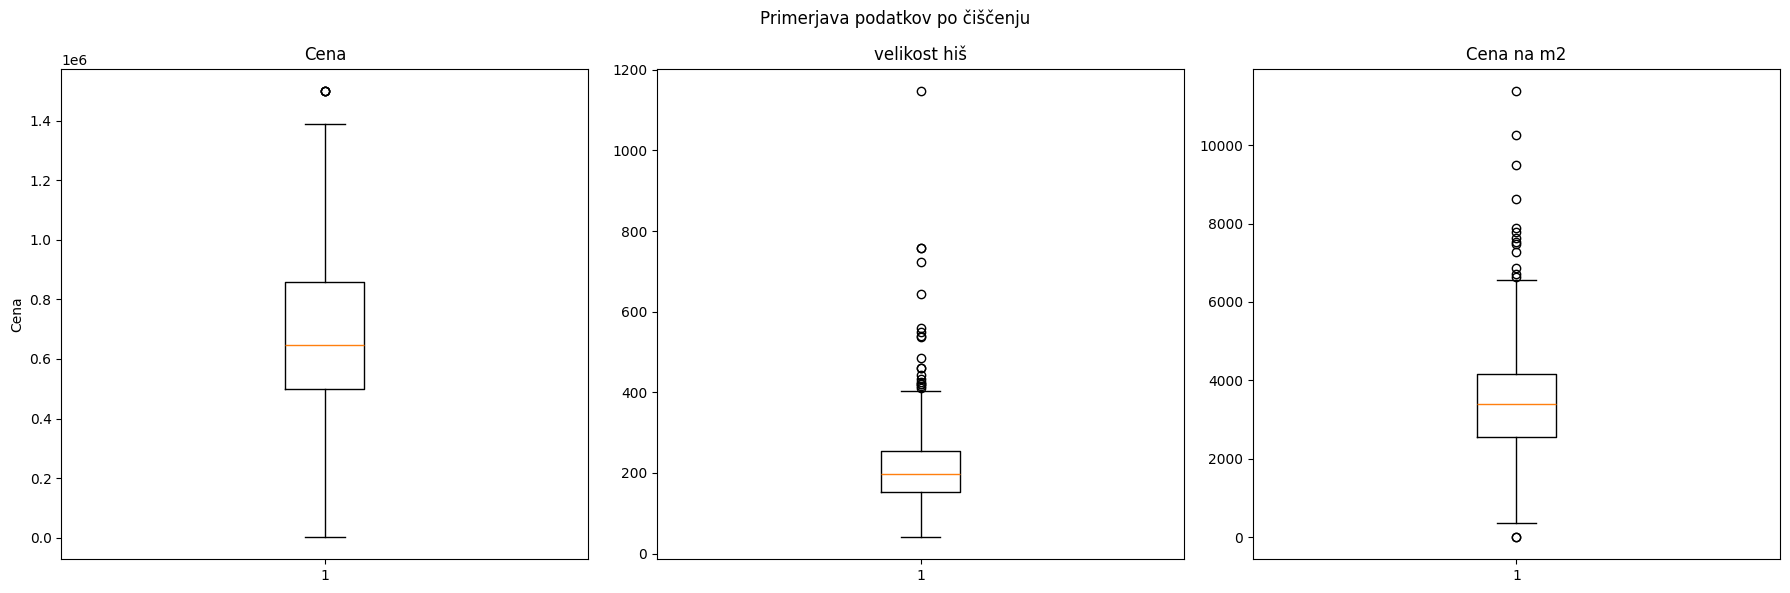

In [21]:
# Ustvari figuro s 3 podgrafi (namesto 2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 vrstica, 3 stolpci

# Boxploti
axes[0].boxplot(hise_cut['CENA'])
axes[0].set_title("Cena")
axes[0].set_ylabel("Cena")

axes[1].boxplot(hise_cut["m2"])
axes[1].set_title("velikost hiš")

axes[2].boxplot(hise_cut["CENA_na_m2"])
axes[2].set_title("Cena na m2")

plt.suptitle("Primerjava podatkov po čiščenju")
plt.tight_layout()
plt.show()

Če porežemo velikost in damo samo povprečne velikosti, torej od 25%-75% vseh vnosov, kakšne cene dobimo?

In [22]:
# 1. Izračun kvartilov za stolpec 'm2'
Q1 = hise['m2'].quantile(0.25)
Q3 = hise['m2'].quantile(0.75)
IQR = Q3 - Q1

# 2. Meje za izločanje outlierjev
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filtriranje vrstic brez outlierjev
m2_cut_hise = hise[(hise["m2"] >= lower_bound) & (hise["m2"] <= upper_bound)]
m2_cut_hise.describe()

,CENA,m2,LETO,ZEMLJISCE,CENA_na_m2
count,333.00,333.00,333.00,295.00,333.00
mean,"731,986.32",208.58,"1,987.13","1,690.94","3,691.37"
std,"357,889.10",78.31,49.81,"4,123.91","1,536.16"
min,"3,000.00",41.30,"1,635.00",31.00,12.20
25%,"499,000.00",152.71,"1,967.00",302.00,"2,672.04"
50%,"648,000.00",196.80,"2,006.00",472.00,"3,509.89"
75%,"864,800.00",254.12,"2,024.00",770.00,"4,297.42"
max,"2,980,000.00",433.50,"2,026.00","22,741.00","11,380.15"


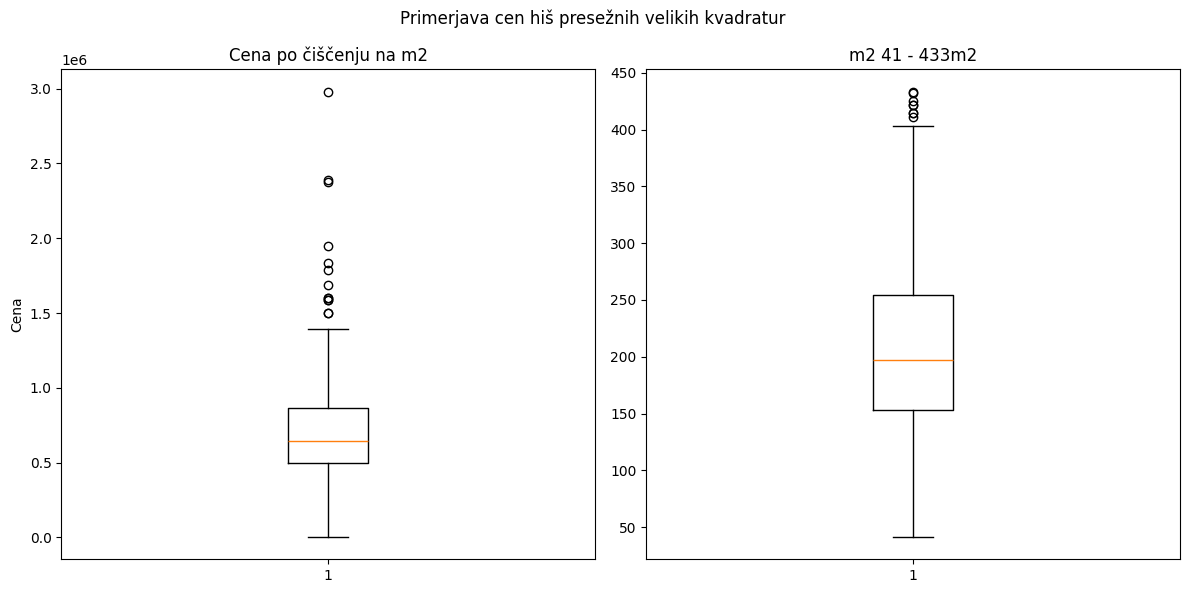

In [23]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 vrstica, 2 stolpca

# Boxploti
axes[0].boxplot(m2_cut_hise['CENA'])
axes[0].set_title("Cena po čiščenju na m2")
axes[0].set_ylabel("Cena")

axes[1].boxplot(m2_cut_hise["m2"])
axes[1].set_title("m2 41 - 433m2")


plt.suptitle("Primerjava cen hiš presežnih velikih kvadratur ")
plt.tight_layout()
plt.show()


Večina hiš pade v kvadraturo med 152m2 in 254m2. Cene pa se gibljejo med 499k € in 865k €. 

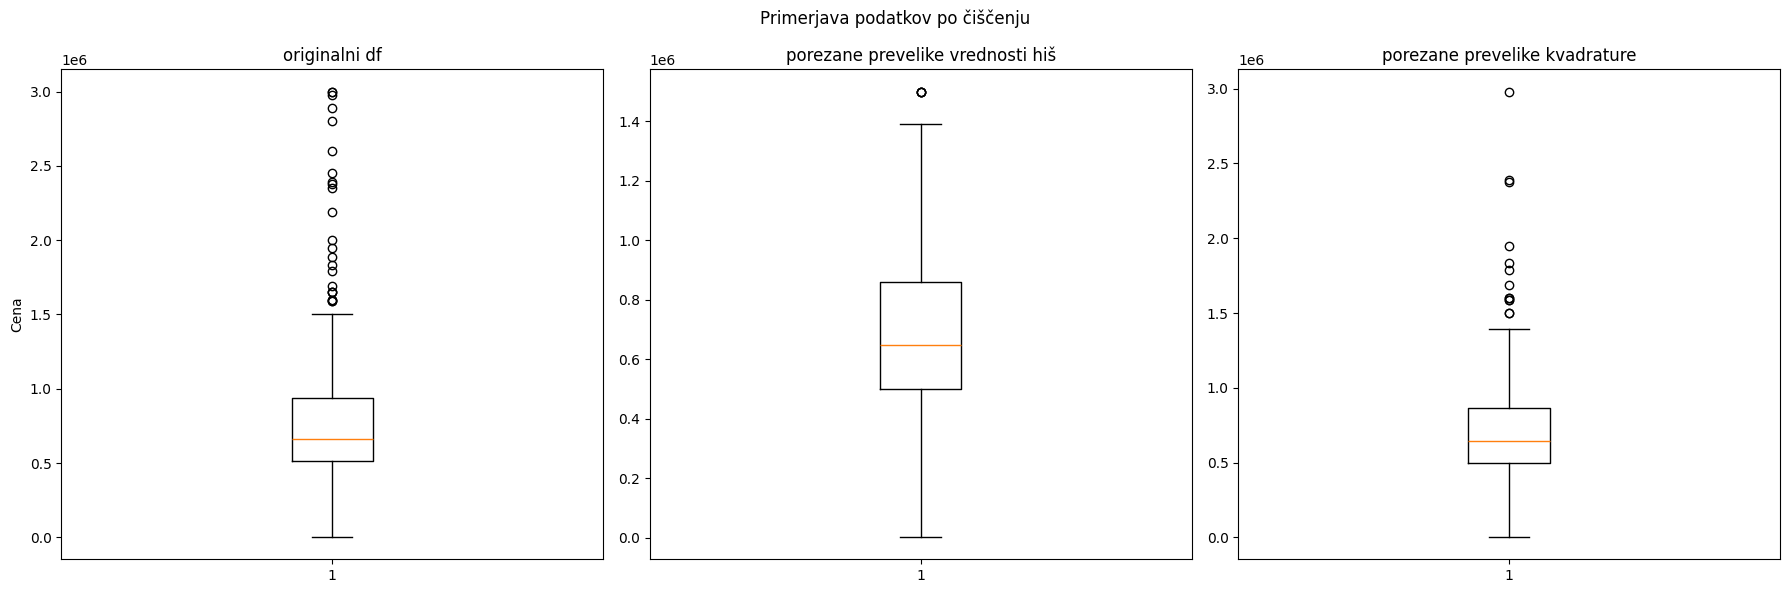

In [27]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 vrstica, 3 stolpca

# Boxploti
axes[0].boxplot(hise['CENA'])
axes[0].set_title("originalni df")
axes[0].set_ylabel("Cena")

axes[1].boxplot(hise_cut["CENA"])
axes[1].set_title("porezane prevelike vrednosti hiš")

axes[2].boxplot(m2_cut_hise["CENA"])
axes[2].set_title("porezane prevelike kvadrature")


plt.suptitle("Primerjava podatkov po čiščenju")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Leto gradnje, porezane kvadrature')

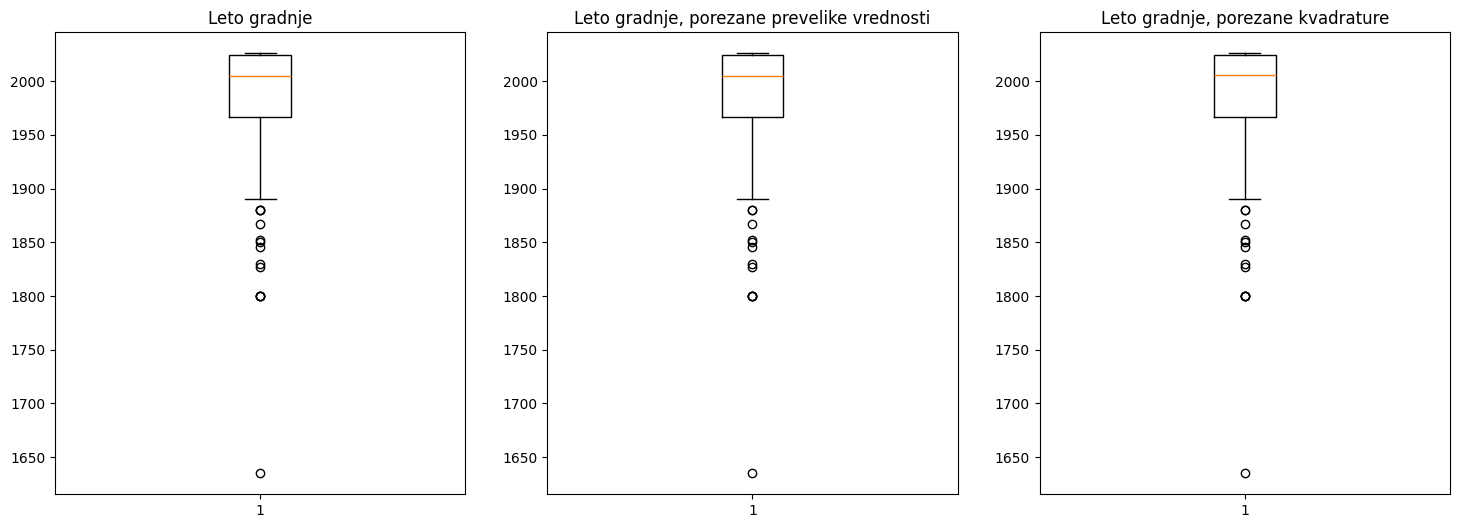

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 vrstica, 3 stolpca
axes[0].boxplot(hise["LETO"])
axes[0].set_title("Leto gradnje")

axes[1].boxplot(hise_cut["LETO"])
axes[1].set_title("Leto gradnje, porezane prevelike vrednosti")

axes[2].boxplot(m2_cut_hise["LETO"])
axes[2].set_title("Leto gradnje, porezane kvadrature")


In [45]:
pd.get_option("display.max_rows")  
leto_gradnje = m2_cut_hise.groupby(m2_cut_hise["LETO"]).count()
leto_gradnje


,NASLOV,CENA,OPIS,m2,NASTROPJE,ZEMLJISCE,Lokacija,Lokacija_grouped,CENA_na_m2
LETO,,,,,,,,,
1635,1,1,1,1,1,1,1,1,1
1800,4,4,4,4,2,4,4,4,4
1827,1,1,1,1,1,1,1,1,1
1830,1,1,1,1,1,1,1,1,1
1846,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2022,5,5,5,5,5,5,5,5,5
2023,11,11,11,11,10,11,11,11,11
2024,55,55,55,55,43,50,55,55,55


In [ ]:
leto_gradnje = leto_gradnje[leto_gradnje.index > 1700]  # odstranimo leta pred 1700, je samo ena hiša

<BarContainer object of 87 artists>

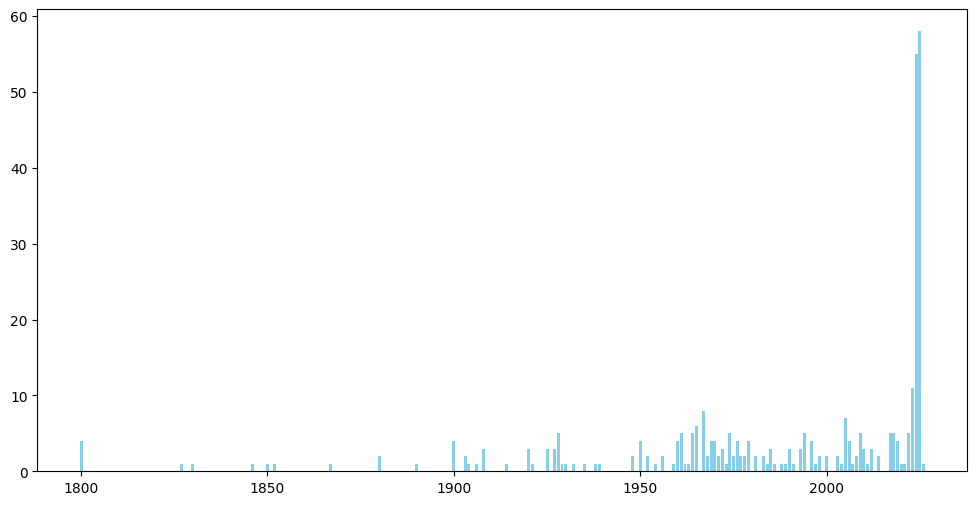

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(leto_gradnje.index, leto_gradnje['CENA'], color='skyblue')

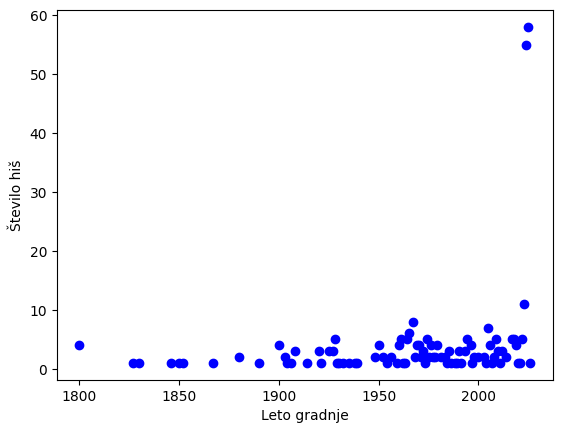

In [66]:
plt.scatter(leto_gradnje.index, leto_gradnje['CENA'], color='blue', label='Leto gradnje')
plt.xlabel('Leto gradnje')
plt.ylabel('Število hiš')
plt.show()

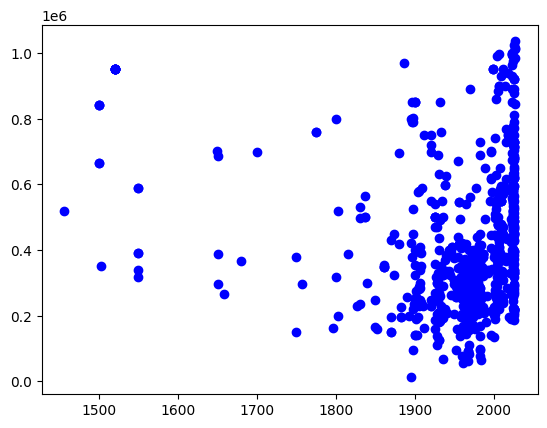

In [70]:
plt.scatter(fleti_cut['LETO'], fleti_cut['CENA'], color='blue', label='Leto gradnje')

In [76]:
fleti_1900_cut = fleti_cut[fleti_cut['LETO'] > 1900]
fleti_1900 = fleti[fleti['LETO'] > 1900]

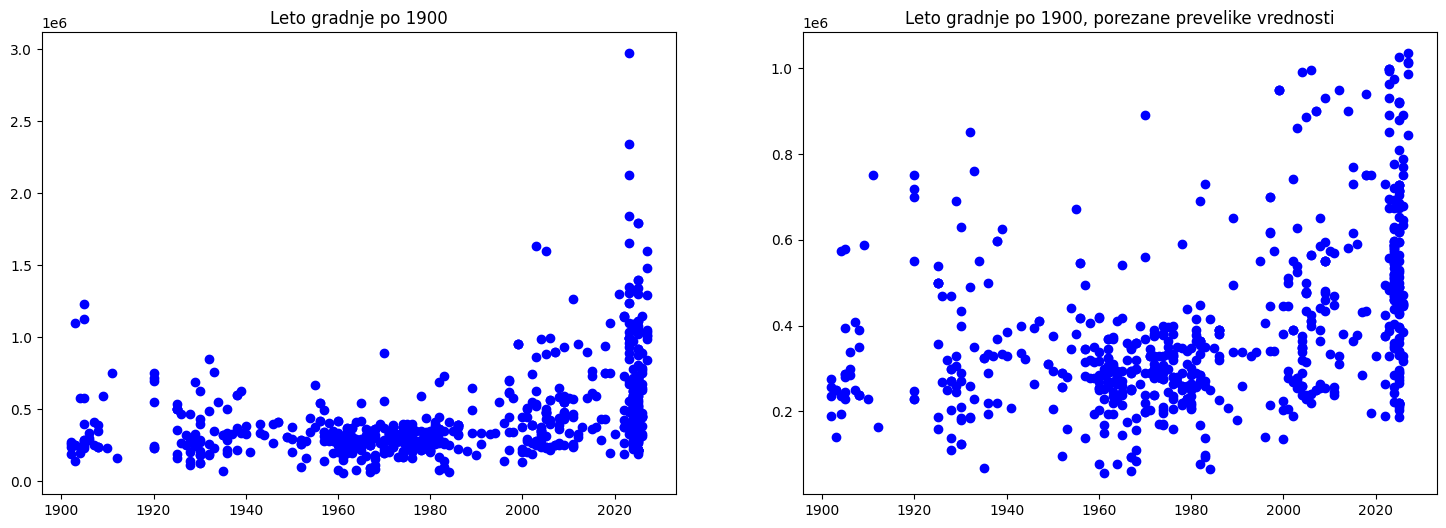

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))  # 1 vrstica, 3 stolpca

axes[0].scatter(fleti_1900['LETO'], fleti_1900['CENA'], color='blue', label='Leto gradnje po 1900')
axes[0].set_title("Leto gradnje po 1900")

axes[1].scatter(fleti_1900_cut['LETO'], fleti_1900_cut['CENA'], color='blue', label='Leto gradnje po 1900, porezane prevelike vrednosti')
axes[1].set_title("Leto gradnje po 1900, porezane prevelike vrednosti")

plt.show()

Visoke cene, oziroma cene ki presegajo milion in več niso rezerverane samo za novo gradnje, čeprav so redkost. Največ stanovanj je bilo zgrajenih v Ljubljani od 1960. leta dalje. Večina stanovanj stane v povprečju 454.000€ za 93m2, novogradnje pa se začnejo nekje pri 200.000€ in lahko dosežejo sam vrh pri 3 milijonih. Večina stanovanj je zgoščenih po 1,1 milijonom.

In [79]:
fleti_1900.describe()

,CENA,m2,LETO,CENA_na_m2
count,729.00,729.00,729.00,729.00
mean,"453,678.44",93.03,"1,984.94","5,017.80"
std,"310,841.55",54.86,35.28,"1,609.96"
min,"56,000.00",11.00,"1,902.00","1,073.62"
25%,"265,775.00",58.00,"1,963.00","4,047.04"
50%,"350,000.00",78.00,"1,982.00","4,780.00"
75%,"545,000.00",112.70,"2,023.00","5,660.17"
max,"2,971,000.00",455.97,"2,027.00","14,357.05"


In [80]:
fleti_cleaned = fleti.drop_duplicates(subset=['CENA', 'm2', 'CENA_na_m2', 'LETO'], keep='first')

In [82]:
fleti.describe()

,CENA,m2,LETO,CENA_na_m2
count,840.00,840.00,840.00,840.00
mean,"482,081.53",97.70,"1,951.96","5,057.97"
std,"346,114.74",58.87,106.79,"1,678.51"
min,"12,000.00",11.00,"1,456.00",100.00
25%,"269,000.00",58.00,"1,938.75","4,020.96"
50%,"365,000.00",80.13,"1,976.00","4,814.19"
75%,"575,312.50",122.02,"2,018.25","5,707.99"
max,"2,971,000.00",455.97,"2,027.00","14,357.05"


In [83]:
fleti_cleaned.describe()

,CENA,m2,LETO,CENA_na_m2
count,761.00,761.00,761.00,761.00
mean,"471,544.01",95.71,"1,960.16","5,056.90"
std,"337,722.62",57.66,90.45,"1,688.22"
min,"12,000.00",11.00,"1,456.00",100.00
25%,"265,000.00",57.90,"1,946.00","4,002.32"
50%,"359,038.00",80.00,"1,978.00","4,805.19"
75%,"558,000.00",119.80,"2,022.00","5,724.14"
max,"2,971,000.00",455.97,"2,027.00","14,357.05"
